In [670]:
# Importing the necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


In [671]:
# Import the data for Italy
df_italy = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')


In [672]:
df_italy = df_italy.drop(['note_en','note_it'], axis=1)

In [673]:
df_italy.head(2)


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623


In [674]:
# English translations of the column names
df_italy.columns =['date', 'state', 'hospitalized with symptoms', 'intensive care', 'total hospitalized', 'home isolation', 'total currently positive', 'change in positive','new currently positive', 'discharged healed', 'deceased', 'total cases', 'total tested']

In [675]:
df_italy.columns


Index(['date', 'state', 'hospitalized with symptoms', 'intensive care',
       'total hospitalized', 'home isolation', 'total currently positive',
       'change in positive', 'new currently positive', 'discharged healed',
       'deceased', 'total cases', 'total tested'],
      dtype='object')

In [676]:
# get the date portion of the date_time field
df_italy['date'] = pd.to_datetime(df_italy['date'])
df_italy['date'] = df_italy['date'].dt.date

In [677]:
#check first five rows
df_italy.head(5)


,date,state,hospitalized with symptoms,intensive care,total hospitalized,home isolation,total currently positive,change in positive,new currently positive,discharged healed,deceased,total cases,total tested
0,2020-02-24,ITA,101,26,127,94,221,0,221,1,7,229,4324
1,2020-02-25,ITA,114,35,150,162,311,90,93,1,10,322,8623
2,2020-02-26,ITA,128,36,164,221,385,74,78,3,12,400,9587
3,2020-02-27,ITA,248,56,304,284,588,203,250,45,17,650,12014
4,2020-02-28,ITA,345,64,409,412,821,233,238,46,21,888,15695


In [678]:
#drop columns we don't need
df_italy = df_italy.drop(['state', 'hospitalized with symptoms', 'intensive care', 'total hospitalized', 'home isolation',  'new currently positive', 'change in positive','discharged healed', 'total cases'],  axis=1)

In [679]:
#check what we have
df_italy.head(5)

,date,total currently positive,deceased,total tested
0,2020-02-24,221,7,4324
1,2020-02-25,311,10,8623
2,2020-02-26,385,12,9587
3,2020-02-27,588,17,12014
4,2020-02-28,821,21,15695


In [680]:
df_italy['date index'] = np.arange(len(df_italy))


In [681]:
df_italy.head(5)

,date,total currently positive,deceased,total tested,date index
0,2020-02-24,221,7,4324,0
1,2020-02-25,311,10,8623,1
2,2020-02-26,385,12,9587,2
3,2020-02-27,588,17,12014,3
4,2020-02-28,821,21,15695,4


In [682]:
df_italy.drop('date', axis=1)

,total currently positive,deceased,total tested,date index
0,221,7,4324,0
1,311,10,8623,1
2,385,12,9587,2
3,588,17,12014,3
4,821,21,15695,4
5,1049,29,18661,5
6,1577,34,21127,6
7,1835,52,23345,7
8,2263,79,25856,8
9,2706,107,29837,9


In [683]:
# Import the data for Scotland
df_scot = pd.read_csv('https://raw.githubusercontent.com/watty62/Scot_covid19/master/data/processed/scot_test_positive_deceased.csv')


In [684]:
df_scot


,Date,total currently positive,deceased,total tested,date index
0,21-Mar-20,373,7,8259,0
1,22-Mar-20,416,10,8679,1
2,23-Mar-20,499,14,9364,2
3,24-Mar-2020,584,16,9968,3
4,25-Mar-2020,719,22,10676,4
5,26-Mar-2020,894,25,11487,5
6,27-Mar-2020,1059,33,12273,6
7,28-Mar-2020,1245,40,13133,7
8,29-Mar-2020,1384,41,13889,8
9,30-Mar-2020,1563,47,14624,9


In [685]:
df_scot.drop('Date', axis=1)

,total currently positive,deceased,total tested,date index
0,373,7,8259,0
1,416,10,8679,1
2,499,14,9364,2
3,584,16,9968,3
4,719,22,10676,4
5,894,25,11487,5
6,1059,33,12273,6
7,1245,40,13133,7
8,1384,41,13889,8
9,1563,47,14624,9


In [686]:
#prepare to merge data frames

df_italy.columns =['date','italy_cp','italy_decd','italy_tt','date index']
df_italy.drop('date', axis=1)
df_scot.columns =['date','scot_cp','scot_decd','scot_tt','date index']
df_scot.drop('date', axis=1)

,scot_cp,scot_decd,scot_tt,date index
0,373,7,8259,0
1,416,10,8679,1
2,499,14,9364,2
3,584,16,9968,3
4,719,22,10676,4
5,894,25,11487,5
6,1059,33,12273,6
7,1245,40,13133,7
8,1384,41,13889,8
9,1563,47,14624,9


In [687]:
#Merge dataframes on "date index"
df_merged = pd.merge(df_italy, df_scot, on='date index')

In [688]:
#check merged dataframe
df_merged

,date_x,italy_cp,italy_decd,italy_tt,date index,date_y,scot_cp,scot_decd,scot_tt
0,2020-02-24,221,7,4324,0,21-Mar-20,373,7,8259
1,2020-02-25,311,10,8623,1,22-Mar-20,416,10,8679
2,2020-02-26,385,12,9587,2,23-Mar-20,499,14,9364
3,2020-02-27,588,17,12014,3,24-Mar-2020,584,16,9968
4,2020-02-28,821,21,15695,4,25-Mar-2020,719,22,10676
5,2020-02-29,1049,29,18661,5,26-Mar-2020,894,25,11487
6,2020-03-01,1577,34,21127,6,27-Mar-2020,1059,33,12273
7,2020-03-02,1835,52,23345,7,28-Mar-2020,1245,40,13133
8,2020-03-03,2263,79,25856,8,29-Mar-2020,1384,41,13889
9,2020-03-04,2706,107,29837,9,30-Mar-2020,1563,47,14624


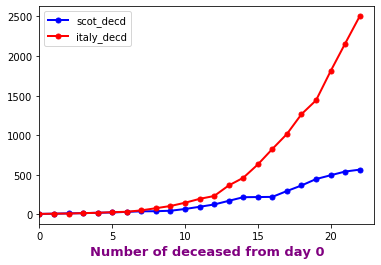

In [691]:
#plot our number of deaths for Scotland and Italy

# multiple line plot
plt.plot( 'date index', 'scot_decd', data=df_merged, marker='o', markerfacecolor='blue', markersize=5, color='blue', linewidth=2)
plt.plot( 'date index', 'italy_decd', data=df_merged, marker='o', markerfacecolor='red', markersize=5, color='red', linewidth=2)
plt.xlim(0,23)
plt.xlabel('Number of deceased from day 0', fontweight='bold', color = 'Purple', fontsize='13', horizontalalignment='center')
plt.legend()



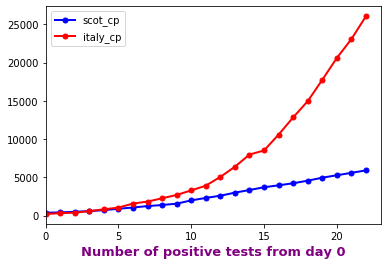

In [692]:
#plot our number of Confirmed Positive cases for Scotland and Italy

plt.plot( 'date index', 'scot_cp', data=df_merged, marker='o', markerfacecolor='blue', markersize=5, color='blue', linewidth=2)
plt.plot( 'date index', 'italy_cp', data=df_merged, marker='o', markerfacecolor='red', markersize=5, color='red', linewidth=2)
plt.xlim(0,23)
plt.xlabel('Number of positive tests from day 0', fontweight='bold', color = 'Purple', fontsize='13', horizontalalignment='center')
plt.legend()


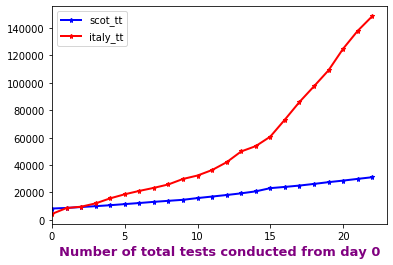

In [693]:
#plot our Total number of Tests administered for Scotland and Italy

plt.plot( 'date index', 'scot_tt', data=df_merged, marker='*', markerfacecolor='blue', markersize=5, color='blue', linewidth=2)
plt.plot( 'date index', 'italy_tt', data=df_merged, marker='*', markerfacecolor='red', markersize=5, color='red', linewidth=2)
plt.xlim(0,23)
plt.xlabel('Number of total tests conducted from day 0', fontweight='bold', color = 'Purple', fontsize='13', horizontalalignment='center')
plt.legend()


## Look at Scotland's testing overall
is it being ramped up?

In [694]:
# Import the data for Scotland
df_tests = pd.read_csv('https://raw.githubusercontent.com/watty62/Scot_covid19/master/data/processed/scot_tests.csv')


In [695]:
df_tests.columns = ["Date", "Conducted","Today_Pos", "Today_Neg","Total_Pos","Total_Neg","Total" ]
df_tests


,Date,Conducted,Today_Pos,Today_Neg,Total_Pos,Total_Neg,Total
0,24-Jan-20,2,0,2,0,2,2
1,25-Jan-20,3,0,3,0,5,5
2,26-Jan-20,1,0,1,0,6,6
3,27-Jan-20,1,0,1,0,7,7
4,28-Jan-20,4,0,4,0,11,11
...,...,...,...,...,...,...,...
75,08-Apr-2020,1204,336,868,4565,21661,26226
76,09-Apr-2020,1292,392,900,4957,22561,27518
77,10-Apr-2020,1134,318,816,5275,23377,28652
78,11-Apr-2020,1251,315,936,5590,24313,29903


### Limit it since the start of March 2020


In [696]:
df_tests = df_tests[40:]

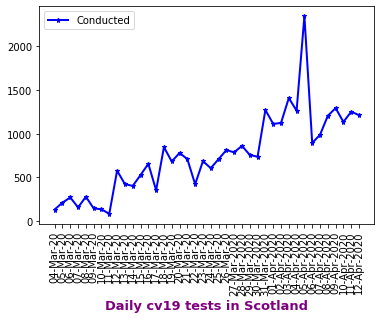

In [697]:
plt.plot( 'Date', 'Conducted', data=df_tests, marker='*', markerfacecolor='blue', markersize=5, color='blue', linewidth=2)
plt.xlabel('Daily cv19 tests in Scotland', fontweight='bold', color = 'Purple', fontsize='13', horizontalalignment='center')
plt.xticks(rotation=90)
plt.legend()


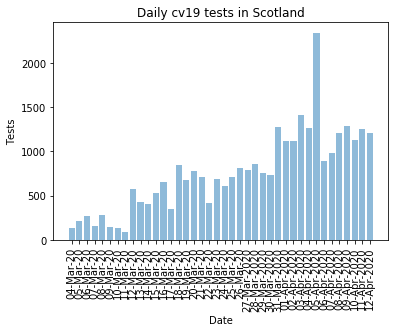

In [698]:

plt.bar('Date', 'Conducted', data=df_tests, align='center', alpha=0.5)
plt.xlabel("Date")
plt.ylabel('Tests')
plt.title('Daily cv19 tests in Scotland')
plt.xticks(rotation=90)
plt.show()

In [699]:
df_tests['Tests_Pos_Pct'] = df_tests.Today_Pos / df_tests.Conducted * 100

/Users/ian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [700]:
df_tests

,Date,Conducted,Today_Pos,Today_Neg,Total_Pos,Total_Neg,Total,Tests_Pos_Pct
40,04-Mar-20,131,2,129,3,1043,1046,1.526718
41,05-Mar-20,210,3,207,6,1250,1256,1.428571
42,06-Mar-20,269,5,264,11,1514,1525,1.858736
43,07-Mar-20,155,5,150,16,1664,1680,3.225806
44,08-Mar-20,277,2,275,18,1939,1957,0.722022
45,09-Mar-20,144,5,139,23,2078,2101,3.472222
46,10-Mar-20,133,4,129,27,2207,2234,3.007519
47,11-Mar-20,82,9,73,36,2280,2316,10.975610
48,12-Mar-20,576,24,552,60,2832,2892,4.166667
49,13-Mar-20,422,25,397,85,3229,3314,5.924171


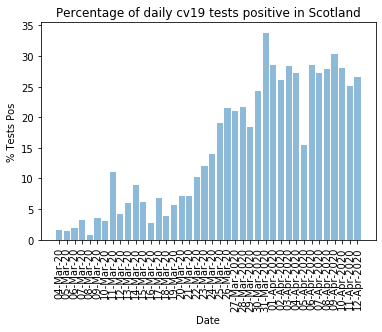

In [701]:

plt.bar('Date', 'Tests_Pos_Pct', data=df_tests, align='center', alpha=0.5)
plt.xlabel("Date")
plt.ylabel('% Tests Pos')
plt.title('Percentage of daily cv19 tests positive in Scotland')
plt.xticks(rotation=90)
plt.show()

In [702]:
# Import the data for Scotland

df_scoticu = pd.read_csv('https://raw.githubusercontent.com/watty62/Scot_covid19/master/data/processed/intensive_care.csv')



In [703]:
df_scoticu

,date,icu_patients
0,18-Mar-2020,6
1,18-Mar-2020,11
2,20-Mar-2020,16
3,21-Mar-2020,20
4,22-Mar-2020,23
5,23-Mar-2020,30
6,24-Mar-2020,42
7,25-Mar-2020,52
8,26-Mar-2020,57
9,27-Mar-2020,72


In [704]:
df_scoticu.columns = ["Date", "ICU Patients"]

In [705]:
df_scoticu['ICU Patients'] = df_scoticu['ICU Patients'].astype(int)
df_scoticu

,Date,ICU Patients
0,18-Mar-2020,6
1,18-Mar-2020,11
2,20-Mar-2020,16
3,21-Mar-2020,20
4,22-Mar-2020,23
5,23-Mar-2020,30
6,24-Mar-2020,42
7,25-Mar-2020,52
8,26-Mar-2020,57
9,27-Mar-2020,72


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text xticklabel objects>)

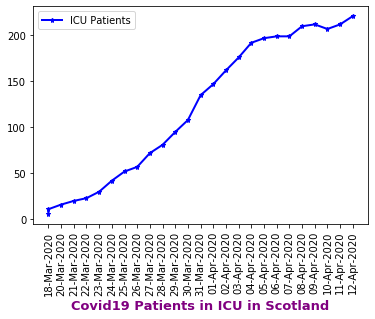

In [706]:
plt.plot( 'Date', 'ICU Patients', data=df_scoticu, marker='*', markerfacecolor='blue', markersize=5, color='blue', linewidth=2)
plt.xlabel('Covid19 Patients in ICU in Scotland', fontweight='bold', color = 'Purple', fontsize='13', horizontalalignment='center')
plt.legend()
plt.xticks(rotation=90)